## Классификация постов
Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина поста
max_len = 11
# Количество классов
nb_classes = 15

## Загрузка набора данных

In [3]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [4]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2)

In [7]:
train

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
6021,🤣,8,1,smile,positive/negative,0,на троечку старайся лучше а то заменят 🤣
4627,😁,7,1,smile,positive/negative,0,ровно столько же сколько выбрали путина 😁
5386,😂,7,1,smile,positive/negative,0,то чувство когда ты с балаково 😂
9047,🤣,5,1,smile,positive/negative,0,прыгать будет как ослик 🤣
6126,😅,11,1,smile,positive/negative,0,а на каких сайтах ты видел девушек с хвостикам...
...,...,...,...,...,...,...,...
2315,😃,2,1,smile,positive/negative,0,нэт😃
5321,🤣,4,1,smile,positive/negative,0,нифига ты добрая🤣
4835,😩,6,1,sadness,negative,4,щаб кеш через вк переводить😩
5848,🤣,7,1,smile,positive/negative,0,"фу, оранжевый салон.. не куплю🤣"


Выделяем данные для обучения

In [8]:
posts = train['clean_text']

In [9]:
posts[:5]

6021             на троечку старайся лучше а то заменят 🤣
4627            ровно столько же сколько выбрали путина 😁
5386                     то чувство когда ты с балаково 😂
9047                            прыгать будет как ослик 🤣
6126    а на каких сайтах ты видел девушек с хвостикам...
Name: clean_text, dtype: object

Выделяем правильные ответы

In [13]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [14]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Токенизация текста

Создаем токенизатор Keras

In [16]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на постах

In [17]:
tokenizer.fit_on_texts(posts)

Просматриваем словарь токенизатора

In [18]:
tokenizer.word_index

{'не': 1,
 'и': 2,
 'в': 3,
 '🤣': 4,
 'а': 5,
 'это': 6,
 'что': 7,
 '😂': 8,
 'я': 9,
 'на': 10,
 '😁': 11,
 'у': 12,
 'как': 13,
 'с': 14,
 'так': 15,
 '😅': 16,
 'то': 17,
 'ты': 18,
 'ну': 19,
 '😄': 20,
 'да': 21,
 '🤔': 22,
 'вот': 23,
 'же': 24,
 'за': 25,
 'все': 26,
 'по': 27,
 'вы': 28,
 'тоже': 29,
 '😉': 30,
 'он': 31,
 '😊': 32,
 'уже': 33,
 'мне': 34,
 '😏': 35,
 'когда': 36,
 'бы': 37,
 '😆': 38,
 'просто': 39,
 'из': 40,
 'только': 41,
 'меня': 42,
 'если': 43,
 'ещё': 44,
 '😍': 45,
 'есть': 46,
 'она': 47,
 'там': 48,
 'для': 49,
 'от': 50,
 'спасибо': 51,
 '😃': 52,
 'они': 53,
 'кто': 54,
 'но': 55,
 'к': 56,
 'нет': 57,
 'очень': 58,
 '😎': 59,
 'будет': 60,
 'тебя': 61,
 'было': 62,
 'всё': 63,
 'или': 64,
 'его': 65,
 'может': 66,
 'надо': 67,
 'тебе': 68,
 'лучше': 69,
 '❤': 70,
 'без': 71,
 'можно': 72,
 'вообще': 73,
 'до': 74,
 'вам': 75,
 'где': 76,
 '😳': 77,
 'даже': 78,
 'этот': 79,
 'вас': 80,
 'точно': 81,
 'о': 82,
 'тут': 83,
 'зачем': 84,
 'какой': 85,
 'тогда': 

Преобразуем посты в числовое представление

In [19]:
sequences = tokenizer.texts_to_sequences(posts)

In [20]:
index = 1
print(posts[index])
print(sequences[index])

как сесть на диету 😁
[13, 1160, 11]


In [21]:
tokenizer.word_index['сесть']

8183

Ограничиваем длину постов

In [22]:
x_train = pad_sequences(sequences, maxlen=max_len)

In [23]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0, 3076, 3077,    2, 3078,  127],
       [   0,    0,    0,    0,    0,    0,    0,    0,   13, 1160,   11],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3079],
       [   0,    0,    0,    0,    0,    0,    0,    0,  177, 3080,   59],
       [   0,   19, 3081,  366,    3, 1684, 1685,   26, 1161,  259,   11]],
      dtype=int32)

## Сверточная нейронная сеть

In [24]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(15, activation='softmax'))

In [25]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 7, 250)            40250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 394,313
Trainable params: 394,313
Non-trainable params: 0
__________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [27]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [28]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
52/52 [==============================] - ETA: 0s - loss: 1.7083 - accuracy: 0.6333
Epoch 1: val_accuracy improved from -inf to 0.65176, saving model to best_model_cnn.h5
52/52 [==============================] - 19s 147ms/step - loss: 1.7083 - accuracy: 0.6333 - val_loss: 1.3372 - val_accuracy: 0.6518
Epoch 2/5
52/52 [==============================] - ETA: 0s - loss: 1.1872 - accuracy: 0.6478
Epoch 2: val_accuracy improved from 0.65176 to 0.67073, saving model to best_model_cnn.h5
52/52 [==============================] - 5s 105ms/step - loss: 1.1872 - accuracy: 0.6478 - val_loss: 1.1217 - val_accuracy: 0.6707
Epoch 3/5
52/52 [==============================] - ETA: 0s - loss: 0.8639 - accuracy: 0.7198
Epoch 3: val_accuracy improved from 0.67073 to 0.74390, saving model to best_model_cnn.h5
52/52 [==============================] - 3s 54ms/step - loss: 0.8639 - accuracy: 0.7198 - val_loss: 1.0667 - val_accuracy: 0.7439
Epoch 4/5
50/52 [===========================>..] - ETA: 0s - 

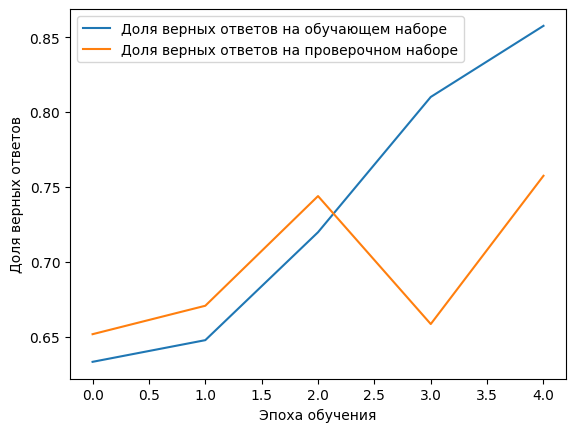

In [29]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [30]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(15, activation='softmax'))

In [31]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 15)                255       
                                                                 
Total params: 323,391
Trainable params: 323,391
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [33]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [34]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
52/52 [==============================] - ETA: 0s - loss: 2.3488 - accuracy: 0.6049
Epoch 1: val_accuracy improved from -inf to 0.65176, saving model to best_model_lstm.h5
52/52 [==============================] - 10s 122ms/step - loss: 2.3488 - accuracy: 0.6049 - val_loss: 1.4915 - val_accuracy: 0.6518
Epoch 2/5
48/52 [==========================>...] - ETA: 0s - loss: 1.3756 - accuracy: 0.6445
Epoch 2: val_accuracy did not improve from 0.65176
52/52 [==============================] - 4s 75ms/step - loss: 1.3717 - accuracy: 0.6460 - val_loss: 1.3255 - val_accuracy: 0.6518
Epoch 3/5
51/52 [============================>.] - ETA: 0s - loss: 1.2756 - accuracy: 0.6464
Epoch 3: val_accuracy did not improve from 0.65176
52/52 [==============================] - 2s 29ms/step - loss: 1.2757 - accuracy: 0.6460 - val_loss: 1.2320 - val_accuracy: 0.6518
Epoch 4/5
48/52 [==========================>...] - ETA: 0s - loss: 1.1510 - accuracy: 0.6455
Epoch 4: val_accuracy did not improve from 0.6

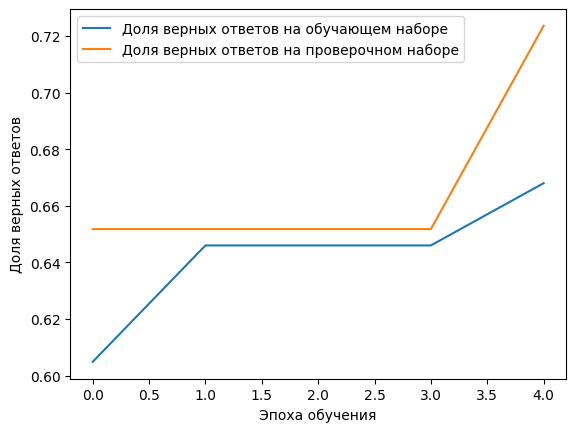

In [35]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [36]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_len))
model_gru.add(GRU(16))
model_gru.add(Dense(15, activation='softmax'))

In [37]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [38]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11, 32)            320000    
                                                                 
 gru (GRU)                   (None, 16)                2400      
                                                                 
 dense_3 (Dense)             (None, 15)                255       
                                                                 
Total params: 322,655
Trainable params: 322,655
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model_gru.h5

In [39]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [40]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
52/52 [==============================] - ETA: 0s - loss: 2.3443 - accuracy: 0.6038
Epoch 1: val_accuracy improved from -inf to 0.65176, saving model to best_model_gru.h5
52/52 [==============================] - 8s 108ms/step - loss: 2.3443 - accuracy: 0.6038 - val_loss: 1.5181 - val_accuracy: 0.6518
Epoch 2/5
52/52 [==============================] - ETA: 0s - loss: 1.3690 - accuracy: 0.6460
Epoch 2: val_accuracy did not improve from 0.65176
52/52 [==============================] - 3s 56ms/step - loss: 1.3690 - accuracy: 0.6460 - val_loss: 1.2487 - val_accuracy: 0.6518
Epoch 3/5
52/52 [==============================] - ETA: 0s - loss: 1.1330 - accuracy: 0.6552
Epoch 3: val_accuracy improved from 0.65176 to 0.72222, saving model to best_model_gru.h5
52/52 [==============================] - 3s 62ms/step - loss: 1.1330 - accuracy: 0.6552 - val_loss: 1.0476 - val_accuracy: 0.7222
Epoch 4/5
52/52 [==============================] - ETA: 0s - loss: 0.9153 - accuracy: 0.7546
Epoch 4: 

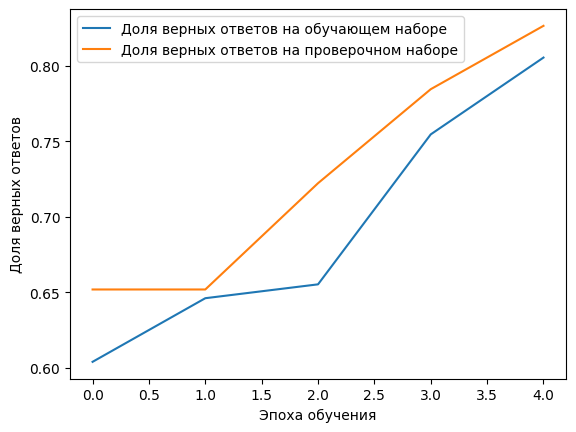

In [41]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования


In [11]:
test

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
6298,🥰,8,1,joy,positive,2,нет это просто увлечение для души🥰.
1895,😆,6,1,smile,positive/negative,0,себя найди в этой жизни 😆
7430,🤗,9,1,joy,positive,2,там есть аляска 🤗 (географически конечно далеко)
148,😂,7,1,smile,positive/negative,0,"с нами стыдно, зато весело! 😂"
5121,😂,10,1,smile,positive/negative,0,я помню до слёз смеялась с его слов этих 😂
...,...,...,...,...,...,...,...
5278,😁,7,1,smile,positive/negative,0,была у него такая же куртёха😁
5894,😆,7,1,smile,positive/negative,0,пацан красавчик забрал вместе с палкой😆
1195,😅,5,1,smile,positive/negative,0,"главное, что ответ честный😅"
6596,😁,10,1,smile,positive/negative,0,эт че из моего контакта вырезка)))) 😁


Преобразуем посты в числовое представление

Нужно использовать токенизатор, обученный на наборе данных train.

In [43]:
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])

In [44]:
x_test = pad_sequences(test_sequences, maxlen=max_len)

In [45]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,  464,    2, 1470],
       [   0,    0,    0,    0,    0,    0,    0,   13, 7683,   79, 6243],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  428,   14],
       [   0,    0,    0,    0,    0,    0,  490,    1, 1761,  403,   93],
       [   0,    0,    0,    0,    0,    0,    0,    9,   37,  348,    8]],
      dtype=int32)

Правильные ответы

In [46]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [47]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных


### Одномерная сверточная сеть

In [48]:
model_cnn.load_weights(model_cnn_save_path)

In [49]:
model_cnn.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 0.9962 - accuracy: 0.7690


[0.996246337890625, 0.7689805030822754]

### Сеть LSTM

In [50]:
model_lstm.load_weights(model_lstm_save_path)

In [51]:
model_lstm.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 1.0007 - accuracy: 0.7017


[1.0006651878356934, 0.7017353773117065]

### Сеть GRU

In [52]:
model_gru.load_weights(model_gru_save_path)

In [53]:
model_gru.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 4ms/step - loss: 0.8153 - accuracy: 0.8086


[0.8153011202812195, 0.8085683584213257]

In [71]:
#test['clean_text'][2384]
test['clean_text'][1246]

'махнем со мной на небо ❤'

In [72]:
#test['class'][2384], test['emotion'][2384], test['tonality'][2384]
test['class'][1246], test['emotion'][1246], test['tonality'][1246]

(2, 'joy', 'positive')

In [73]:
#text = test['clean_text'][2384]
text = test['clean_text'][1246]

In [74]:
sequence = tokenizer.texts_to_sequences([text])

In [75]:
sequence

[[160, 1957, 10, 70]]

In [76]:
data = pad_sequences(sequence, maxlen=max_len)

In [77]:
data

array([[   0,    0,    0,    0,    0,    0,    0,  160, 1957,   10,   70]],
      dtype=int32)

In [78]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

### Одномерная сверточная сеть

In [79]:
result_cnn = model_cnn.predict(data)

1/1 [==============================] - 0s 19ms/step


In [80]:
result_cnn

array([[4.0435497e-02, 4.6165742e-06, 9.5879459e-01, 5.9928396e-05,
        5.5664219e-04, 5.1834926e-05, 2.4601439e-05, 6.1586557e-05,
        4.1303492e-06, 4.5867814e-06, 5.2112995e-07, 1.0952670e-06,
        2.2531627e-07, 1.5460498e-07, 3.2762209e-08]], dtype=float32)

### Сеть LSTM

In [81]:
result_lstm = model_lstm.predict(data)

1/1 [==============================] - 0s 19ms/step


In [82]:
result_lstm

array([[0.34698087, 0.08180802, 0.22363132, 0.06251398, 0.06810167,
        0.03547929, 0.02522271, 0.02820731, 0.02499779, 0.02309398,
        0.02049091, 0.01983721, 0.01277725, 0.01239274, 0.01446493]],
      dtype=float32)

### Сеть GRU

In [83]:
result_gru = model_gru.predict(data)

1/1 [==============================] - 0s 18ms/step


In [84]:
result_gru

array([[0.09026363, 0.05588812, 0.6195971 , 0.04211135, 0.04469933,
        0.02023139, 0.01824824, 0.00799195, 0.00883885, 0.01028279,
        0.04420137, 0.00982331, 0.01570231, 0.006932  , 0.00518831]],
      dtype=float32)